A linear classifier in pure TensorFlow

In [ ]:
import numpy as np

Generating two classes of a random points in 2D plane

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],    #covariance
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class)

Stocking the two classes into an array with shape (2000,2)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Generating the corresponding targets (0 and 1)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype="float32"),
                     np.ones((num_samples_per_class,1), dtype="float32")))

Plotting the two point classes

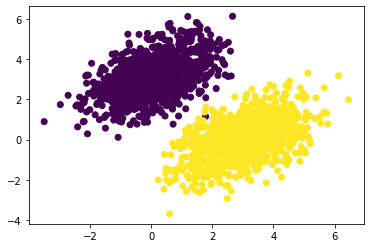

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

Creating the linear classifier variables

In [ ]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim))) 

The forward pass function

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

The mean squared error loss functiom

In [ ]:
def square_loss(targets,predicitions):
  per_sample_losses = tf.square(targets-predicitions)
  return tf.reduce_mean(per_sample_losses)

The training step function

In [ ]:
learning_rate = 0.1
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

The batch training loop

Loss at step 0: 2.7477
Loss at step 1: 0.5003
Loss at step 2: 0.1831
Loss at step 3: 0.1256
Loss at step 4: 0.1101
Loss at step 5: 0.1018
Loss at step 6: 0.0951
Loss at step 7: 0.0892
Loss at step 8: 0.0837
Loss at step 9: 0.0787
Loss at step 10: 0.0742
Loss at step 11: 0.0700
Loss at step 12: 0.0661
Loss at step 13: 0.0626
Loss at step 14: 0.0594
Loss at step 15: 0.0565
Loss at step 16: 0.0538
Loss at step 17: 0.0513
Loss at step 18: 0.0490
Loss at step 19: 0.0470
Loss at step 20: 0.0451
Loss at step 21: 0.0433
Loss at step 22: 0.0417
Loss at step 23: 0.0403
Loss at step 24: 0.0389
Loss at step 25: 0.0377
Loss at step 26: 0.0366
Loss at step 27: 0.0355
Loss at step 28: 0.0346
Loss at step 29: 0.0337
Loss at step 30: 0.0329
Loss at step 31: 0.0322
Loss at step 32: 0.0316
Loss at step 33: 0.0309
Loss at step 34: 0.0304
Loss at step 35: 0.0299
Loss at step 36: 0.0294
Loss at step 37: 0.0290
Loss at step 38: 0.0286
Loss at step 39: 0.0282


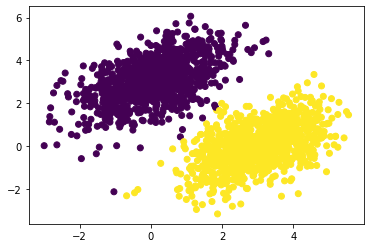

In [ ]:
for step in range(40):
  loss = training_step(inputs,targets)
  print(f"Loss at step {step}: {loss:.4f}")
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

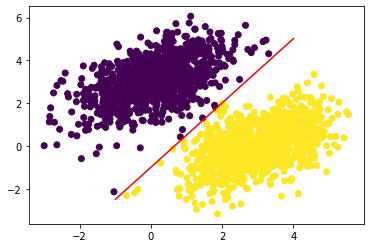

In [ ]:
x = np.linspace(-1,4,100)
y = -W[0] / W[1] * x + (0.5 - b) /W[1] #This is our line's equation
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5) 